### **Project 2: Ames Housing Data and Kaggle Challenge**

# Baseline Model and Kaggle Submission

- [Imports](#Imports)
- [Feature Selection](#Feature-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Submit Predictions](#Submit-Predictions)

## Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from modules.model_executor import run_model, submit_a_kaggle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

## Read in Cleaned Data

In [31]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

In [32]:
# drop the Unnamed: 0 column
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

Drop the unnecessary test pid column

In [33]:
train['saleprice'].describe()

count      2050.000000
mean     181484.609268
std       79275.121591
min       12789.000000
25%      129812.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [34]:
train.head()

,id,ms_subclass,lot_frontage,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_NA,alley_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_NA,bsmt_exposure_No,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,misc_feature_Gar2,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,109,60,69.0552,13517,4,6,8,1976,2005,289.0,4,3,3.0,3.0,7,533.0,1,0.0,192.0,725.0,5,1,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,3,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1

## Feature Selection

In [35]:
features = list(train.corr()['saleprice'][train.corr()['saleprice'].abs() > 0.5].sort_values(ascending=False).index)

Remove the target variable

In [36]:
features.remove('saleprice')

Remove garage year built and mas_vnr_area

In [37]:
features.remove('garage_yr_blt')
features.remove('mas_vnr_area')

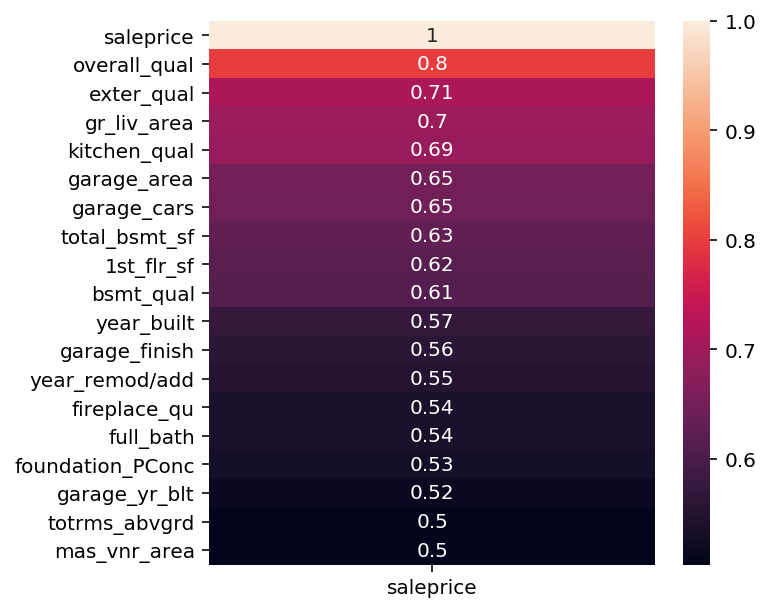

In [38]:
plt.figure(figsize=(5, 5))
sns.heatmap(train.corr()[['saleprice']][train.corr()['saleprice'].abs() > 0.5].sort_values(by='saleprice', ascending=False), annot=True);

## Model Evaluation

In [39]:
X = train[features]
y = train['saleprice']
z = test[features]

In [40]:
import warnings
warnings.simplefilter(action="ignore")

z['id'] = test.loc[:,'id']

In [41]:
pred_df, train_preds, train_y, kaggle = run_model(X, y, z, 'lr')

Cross Val Scores: [0.82774322 0.7149512  0.8342265  0.75532994 0.8310697 ]
  Cross Val Mean: 0.7926641137573932


In [42]:
pred_df

,Key Metrics,Train,Test
0,R2,0.80469,0.84198
1,R2_adj,0.80264,0.83688
2,MAE,22447.84025,22704.12766
3,MSE,1199477621.85779,1055402369.91001
4,RMSE,34633.47545,32486.95692


**Plot True vs predicted values**

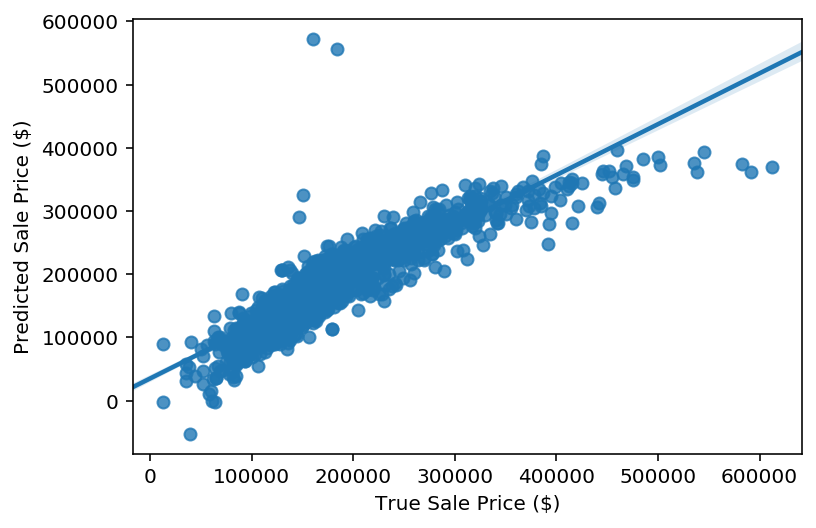

In [44]:
sns.regplot(train_y, train_preds)
plt.xlabel('True Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)');

## Submit Predictions

In [46]:
kaggle.head()

,Id,SalePrice
0,2658,129543.908579
1,2718,195463.633308
2,2414,215131.649999
3,1989,130172.257654
4,625,184213.413016


In [48]:
submit_a_kaggle(kaggle, 1)